# Assignment 1, Notebook 4 - Chris Gochis

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from numpy import arange
%matplotlib inline 
import sys
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
#Check working directory
%pwd

'/Users/ChrisGochis/OneDrive - Rockhurst University/PREDICTIVE MODELS/BIA6303PredictiveModels/Assignment 1'

# Read in AmesHousing.csv into a Dataframe Called Ames

In [3]:
#import data
Ames = pd.read_csv("AmesHousing.csv", sep=",", engine='python')
Ames.shape

(2930, 82)

# Explore the Dimensions and Structures of the Dataframe

In [4]:
Ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
#Check data types
Ames.dtypes.head()

Order             int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
dtype: object

In [6]:
#Remove the ID fields
Ames=Ames.drop(['Order', 'PID'],axis=1)
Ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# designate target variable name and move to front of dataframe
targetName = 'SalePrice'
targetSeries = Ames[targetName]
del Ames[targetName]
Ames.insert(0, targetName, targetSeries)
Ames.head()

,SalePrice,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,215000,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,105000,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,172000,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,244000,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,189900,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [8]:
Ames.describe()

,SalePrice,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,2930.000000,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444
std,79886.692357,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613
min,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,129500.000000,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,160000.000000,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,213500.000000,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Replace missing number values with variable mean
# Replace missing object values with 'NONE'

In [9]:
Ames.isna().any().head()

SalePrice       False
MS SubClass     False
MS Zoning       False
Lot Frontage     True
Lot Area        False
dtype: bool

In [11]:
#Fill NaN values of number variables with mean
for col in Ames.columns[1:]:
    dType = Ames[col].dtype
    if dType == float or dType == int:
        Ames[col].fillna(value=Ames[col].mean(), inplace=True)
    else:
        Ames[col].fillna(value='NONE', inplace=True)

In [12]:
Ames.isna().any().head()

#Success!

SalePrice       False
MS SubClass     False
MS Zoning       False
Lot Frontage    False
Lot Area        False
dtype: bool

# Perform correlation analysis on number variables

In [13]:
#Create df of just numerical values for corr matrix
Ames_num = Ames.select_dtypes(exclude=['object'])
Ames_num.head()

,SalePrice,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,215000,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,528.0,210,62,0,0,0,0,0,5,2010
1,105000,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
2,172000,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
3,244000,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,522.0,0,0,0,0,0,0,0,4,2010
4,189900,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010


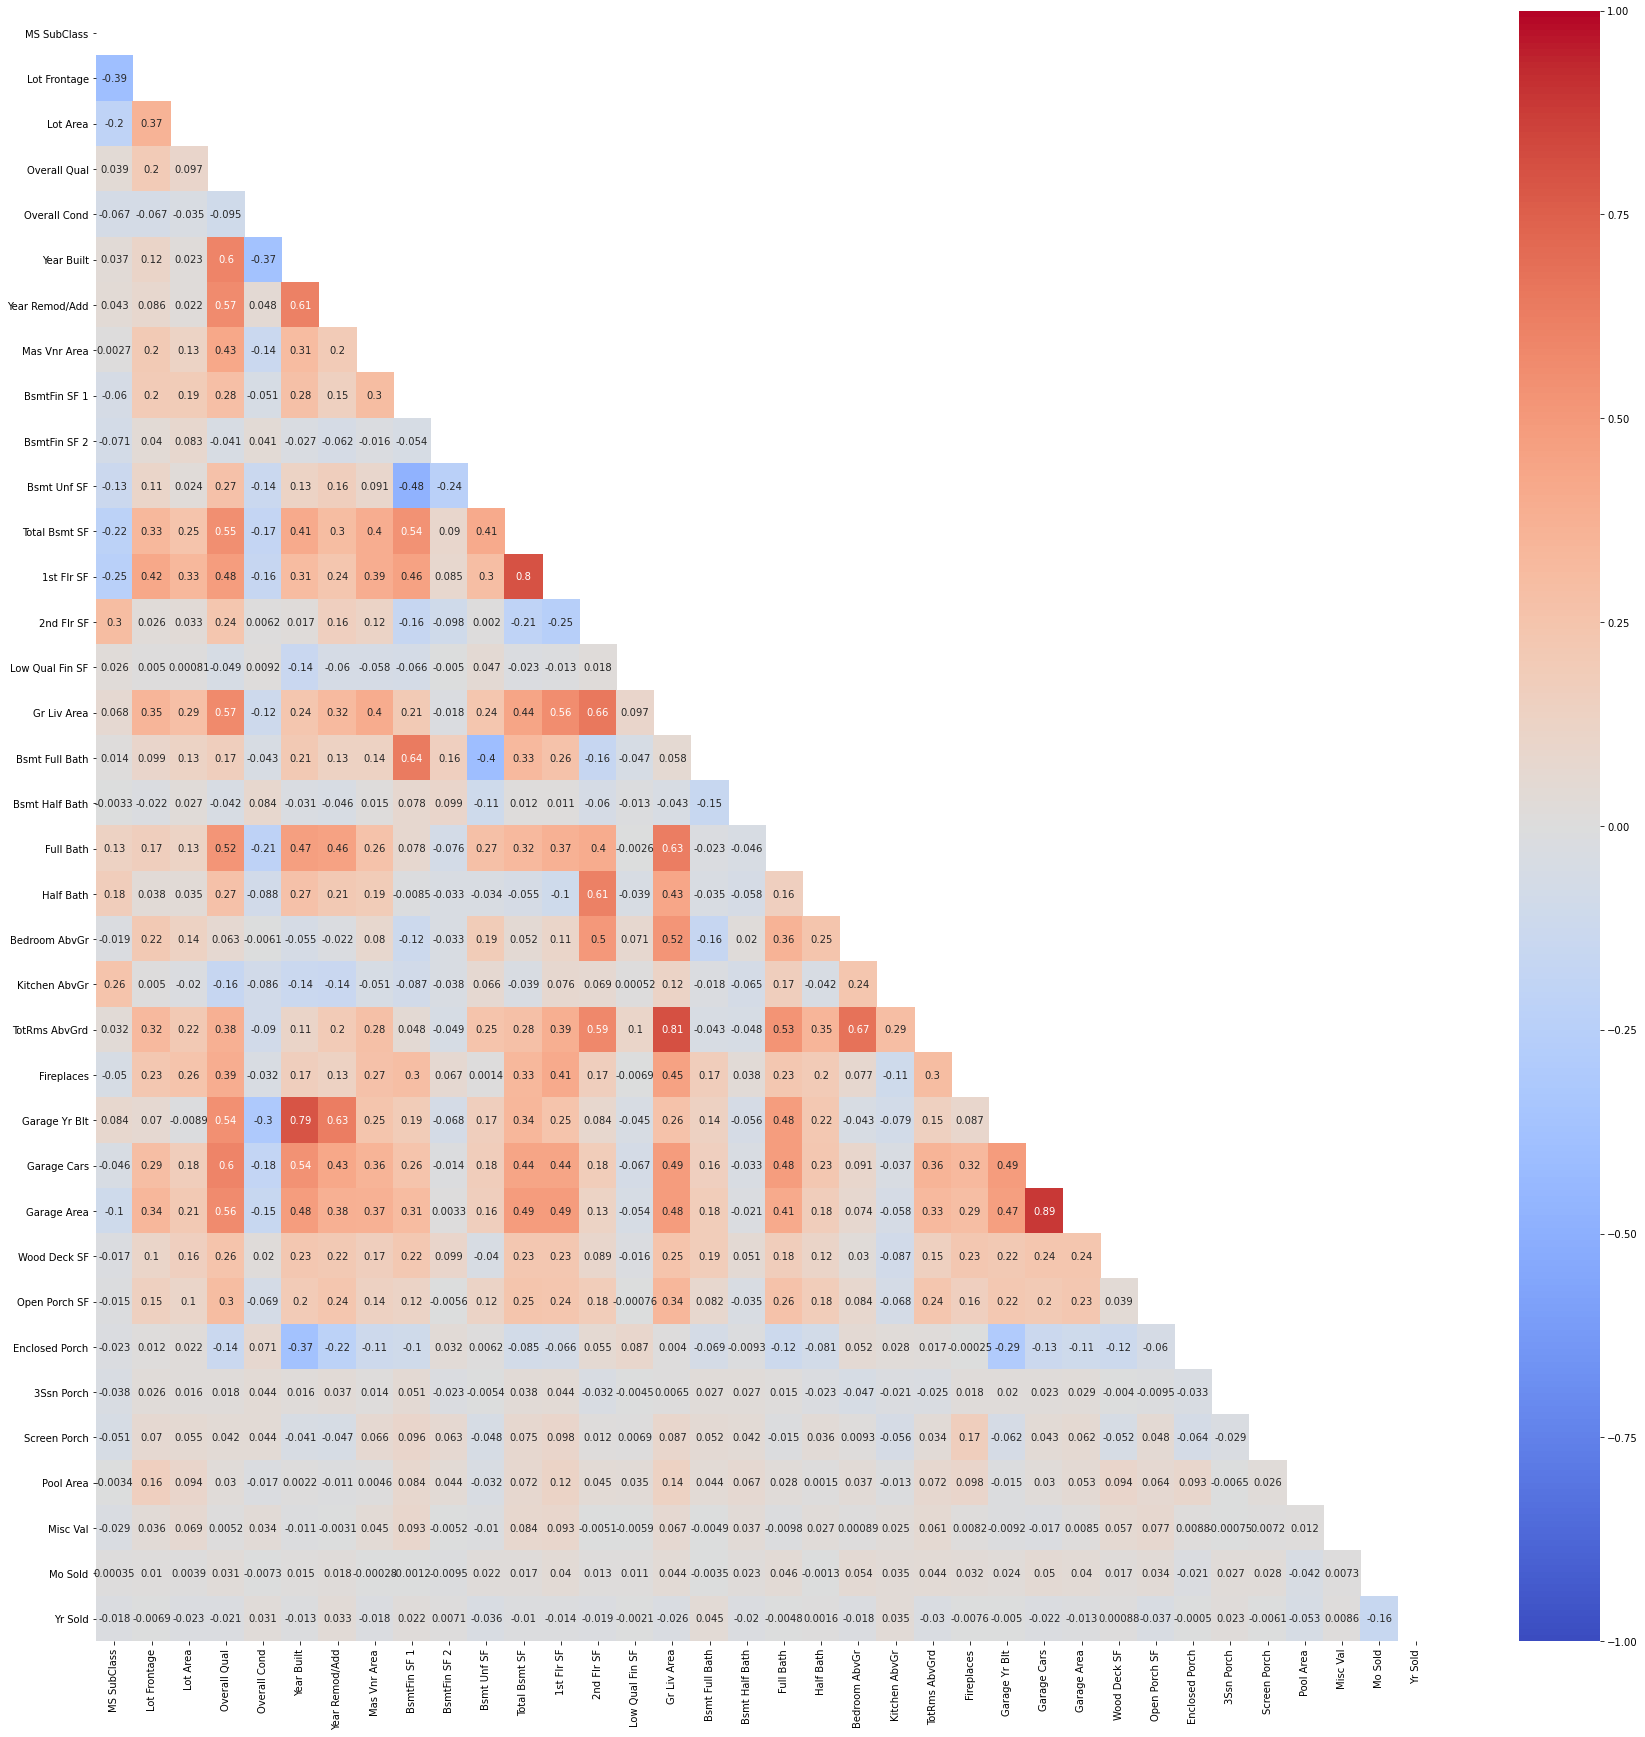

In [14]:
#Create correlation matrix
corr_matrix = Ames_num.iloc[:,1:].corr()
corr_matrix

import seaborn as sns

plt.figure(figsize=(30,30)) #need to adjust size as needed.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

This is a fairly large crrelation matrix, but we can see some interesting data here. Overall, most of the data is fairly low in correlation, but there are a few standouts that we should point out. We can see that Garage Area and Garage Cars have high positive correlation, which is expected, they are reporting very similar information. We can see similar high positive correlation between the Garage Yr Blt, and the Year Built. TotRms AbvGrd has high positive correlation to Gr Liv Area, which makes sense. 1st Flr SF and Total Bsmt SF also have high positive correlation.

Overall there isn't much extreme negative correlation, but we can see a few variables are standing out. Bsmt Unf SF and BsmFin SF1 have negative correlation. Year Built and Overall Cond are negatively correlated, which makes sense. Lot Frontage and MS Subclass also have some negative correlation.

# Convert the categorical variables into dummies.

In [15]:
#Convert categorical variables into dummies
for col in Ames.columns[1:]:
	attName = col
	dType = Ames[col].dtype
	missing = pd.isnull(Ames[col]).any()
	uniqueCount = len(Ames[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		Ames = pd.concat([Ames, pd.get_dummies(Ames[col], prefix=col, drop_first=True)], axis=1)
		del Ames[attName]

In [16]:
Ames.head()

,SalePrice,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,215000,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,105000,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,172000,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,244000,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,189900,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
Ames.shape

(2930, 278)

I opted to use drop_first=True because the dataset was already large and about to get MUCH larger. I wanted to at least remove some of the unneeded variables before starting.

# Create a 70/30 split training and test set.

In [18]:
# split dataset into testing and training
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    Ames.iloc[:,1:].values, Ames.iloc[:,0].values, test_size=0.30, random_state=0)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(2051, 277)
(2051,)
(879, 277)
(879,)


# Build Linear Regression/OLS Model

In [19]:
from sklearn.linear_model import LinearRegression

#Build Linear Regression model
clf_lr = LinearRegression(normalize=False)
clf_lr

LinearRegression()

In [20]:
#Train the LR model
clf_lr.fit(features_train, target_train)

LinearRegression()

In [21]:
#Validate LR model
predicted = clf_lr.predict(features_test)

In [22]:
#View performance of model
print("Coef", clf_lr.intercept_, clf_lr.coef_)
print("MSE", mean_squared_error(target_test, predicted)) 
print("R2", r2_score(target_test, predicted))
print("MAE", mean_absolute_error(target_test, predicted)) 

Coef 136988.65867751592 [-5.11489214e+01  7.10726117e+01  7.34641110e-01  7.45657705e+03
  5.63551075e+03  3.27239426e+02  4.63894351e+01  2.69008030e+01
  1.80502930e+01  9.81453806e+00 -3.21438132e+00  2.46505487e+01
  1.27216447e+01  2.37492730e+01 -2.07535322e-01  3.62661578e+01
  2.06685077e+03  1.27901134e+03  2.11320875e+03  1.32414692e+03
 -3.95261616e+03 -9.54079642e+03  8.59650516e+02  7.04982367e+03
  4.41782096e+00  4.27717222e+03  1.14864411e+01  8.46572811e+00
  5.29424389e+00  1.88418254e+01  1.50138032e+01  4.65430265e+01
 -2.68058963e+02  2.30570468e+00 -2.45442811e+02 -7.51708002e+02
 -2.88675507e+03  1.26144772e+04  4.44409274e+03  6.87692163e+03
  5.71079356e+03  4.02319755e+02  1.54050234e+04  3.05404984e+02
 -4.64364130e+03  1.21829567e+03 -6.00632545e+03  4.71777087e+01
  6.60110306e+03 -6.37065710e+03 -1.90936953e+03 -3.15105599e+04
  4.44409274e+03  5.28760571e+03 -3.96243745e+03 -1.17144086e+04
  1.22471590e+03  3.60798217e+03 -3.26215233e+04  1.41658233e+04
 

Not bad! We are seeing an R2 score of around 73%. Let's see if we can improve by imposing some regularization.

NOTE: When running this model with normalize=True, I was getting negative R2 values. When running normalize=False, the results seemed much more reasonable. They also compare much better with the following models. I believe this has to do with the model normalizing all of my dummy variables.

# Build Ridge Regression

In [23]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Build the Ridge Model, standardizing the data first
clf_rg = make_pipeline(StandardScaler(), Ridge(alpha=1))
print(clf_rg)

#Train the model
clf_rg.fit(features_train, target_train)

# Validate the model
predicted_rg= clf_rg.predict(features_test)

# summarize the fit of the model
print("Coef", clf_rg['ridge'].intercept_, clf_rg['ridge'].coef_)

#print("Coef", clf_rg.named_steps['ridge'].intercept_, clf_rg.named_steps['ridge'].coef_)

print("MSE", mean_squared_error(target_test, predicted_rg))
print("R2", r2_score(target_test, predicted_rg))
print("MAE", mean_absolute_error(target_test, predicted_rg))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])
Coef 180321.6499268649 [-2.18533853e+03  1.31838324e+03  5.84624928e+03  1.06753730e+04
  6.25367050e+03  9.51912727e+03  9.36614992e+02  4.79326397e+03
  8.78905068e+03  2.10543964e+03 -4.95507300e+02  9.44821003e+03
  6.61459327e+03  1.16804990e+04  2.79403882e+02  1.53039896e+04
  1.20393612e+03  3.00893110e+02  1.24860513e+03  7.03814098e+02
 -3.14178887e+03 -1.98601268e+03  1.42346458e+03  4.59456333e+03
  1.67167132e+02  3.42060622e+03  2.33179350e+03  9.95371765e+02
  3.31136529e+02  1.19803333e+03  4.17320685e+02  2.77247652e+03
 -5.54182806e+03  9.00034384e+02 -6.84217522e+02 -1.00005753e+03
 -6.36554657e+02  1.71062320e+03  6.03504770e+01  2.08218398e+02
  5.36245346e+02 -1.46088952e+03  1.04265497e+03  1.28461230e+02
 -6.89355866e+02  2.86541850e+02 -5.27985458e+02  3.06967159e+01
  1.44162130e+03 -8.55254035e+02 -3.74513846e+02 -7.15366970e+02
  6.03504770e+01  1.33015209e+03 -

We are already makeing substantial improvements over the original model! The coefficients are shrinking substantially.

We are now seeing a R2 score of 75%

# Use Grid Search to find optimal Ridge Penalty Parameter

In [52]:
#param_grid={"alpha": arange(1,10,1)}
param_grid={"alpha": arange(8,10,.1)}

# run grid search
grid_search = GridSearchCV(clf_rg['ridge'], param_grid=param_grid,n_jobs=-1,cv=5)

grid_search.fit(features_train, target_train)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)  

Grid Scores {'mean_fit_time': array([0.0253726 , 0.03466516, 0.03945436, 0.04711962, 0.0449451 ,
       0.04528518, 0.04737363, 0.04379511, 0.04260049, 0.04241643,
       0.04483581, 0.04201598, 0.04075985, 0.04433117, 0.04197083,
       0.04388466, 0.04416485, 0.04445944, 0.04002028, 0.0311944 ]), 'std_fit_time': array([0.00475395, 0.00352729, 0.000656  , 0.00385728, 0.0048839 ,
       0.00442277, 0.00362066, 0.00553238, 0.00601885, 0.00401554,
       0.00462422, 0.00233198, 0.00366791, 0.00379948, 0.00338377,
       0.00333469, 0.00223971, 0.00242796, 0.00138522, 0.00377137]), 'mean_score_time': array([0.00136299, 0.00169411, 0.00144682, 0.0018611 , 0.00165982,
       0.0018435 , 0.0016922 , 0.00177469, 0.00155354, 0.00154939,
       0.00226254, 0.00234933, 0.00194936, 0.00249567, 0.00208101,
       0.00181518, 0.00163651, 0.00151892, 0.00189571, 0.00082769]), 'std_score_time': array([3.03593175e-04, 2.79565832e-04, 9.59580254e-05, 6.20599357e-04,
       1.65309437e-04, 2.83173768e-0

# Alpha 9.4 is chosen as best penalty parameter. Update Ridge Regression.

In [80]:
#Rerun ridge regression

#Build the Ridge Model, standardizing the data first
clf_rg = make_pipeline(StandardScaler(), Ridge(alpha=9.4))
print(clf_rg)

#Train the model
clf_rg.fit(features_train, target_train)

# Validate the model
predicted_rg= clf_rg.predict(features_test)

# summarize the fit of the model
print("Coef", clf_rg['ridge'].intercept_, clf_rg['ridge'].coef_)

print("MSE", mean_squared_error(target_test, predicted_rg))
print("R2", r2_score(target_test, predicted_rg))
print("MAE", mean_absolute_error(target_test, predicted_rg))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=9.4))])
Coef 180321.64992686486 [-2.55419157e+03  3.17890195e+02  5.43568399e+03  1.14195829e+04
  6.06585584e+03  8.26261913e+03  8.49888679e+02  5.02150074e+03
  7.19482316e+03  2.03935152e+03 -6.21263118e+02  7.64965603e+03
  6.81006465e+03  1.04554810e+04  3.84976869e+02  1.44124522e+04
  1.76027542e+03  3.16748948e+02  1.67824813e+03  8.85620217e+02
 -2.70076719e+03 -2.03818859e+03  1.97112467e+03  4.64876392e+03
  3.83689881e+02  4.13139331e+03  1.72678238e+03  9.11492819e+02
  2.13685253e+02  1.16878968e+03  5.28993512e+02  3.02325202e+03
  5.60955086e+03  8.29415449e+02 -7.25499090e+02 -1.00086406e+03
 -6.41136263e+02  1.66333437e+03  1.04880535e+02  2.48949630e+02
  5.76542249e+02 -1.50157315e+03  9.49947127e+02  3.27619598e+02
 -5.70710792e+02  5.15844932e+02 -9.62538995e+02  5.52352896e+01
  2.01982098e+03 -3.49981241e+02  3.91008590e+02 -8.20655005e+02
  1.04880535e+02  1.27479428e+0

Using the alpha = 9.4 penalty, we have increased the R2 value of this model to 80%! Our error means are also decreasing.

# Build LASSO Regression Model

In [24]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Build the LASSO model, standardizing the data first
clf_ls = make_pipeline(StandardScaler(), Lasso(alpha=100))
print(clf_ls)

# Train the LASSO model
clf_ls.fit(features_train, target_train)

# Validate the LASSO model
predicted_ls= clf_ls.predict(features_test)

# summarize the fit of the model
print("Coef", clf_ls['lasso'].intercept_, clf_ls['lasso'].coef_)

print("MSE", mean_squared_error(target_test, predicted_ls))
print("R2", r2_score(target_test, predicted_ls))
print("MAE", mean_absolute_error(target_test, predicted_ls))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=100))])
Coef 180321.64992686486 [-3.59168928e+03  5.43935719e+02  5.05573802e+03  1.17685958e+04
  6.00218113e+03  8.59830380e+03  1.11061836e+03  4.94485868e+03
  8.17345542e+03  2.51457412e+03 -0.00000000e+00  7.16971225e+03
  0.00000000e+00  1.63039603e+03 -4.98594612e+02  2.43166770e+04
  1.43519442e+03  0.00000000e+00  1.13370093e+03  6.69800460e+02
 -2.83788344e+03 -2.08478864e+03  1.54284273e+03  3.87454139e+03
  5.97551828e+02  3.76108156e+03  1.68832523e+03  8.54817326e+02
  2.65548557e+02  9.44512330e+02  3.84912919e+02  2.90430055e+03
 -0.00000000e+00  1.98654683e+02 -5.53774738e+02 -7.32591053e+02
 -4.80772055e+02  1.20414495e+03  9.42529155e+01 -0.00000000e+00
  0.00000000e+00 -1.99865695e+03  9.23619506e+02  1.84870013e+02
 -4.44596036e+02  5.23374899e+02 -6.20240616e+02 -0.00000000e+00
  1.71134435e+03 -3.85278603e+02  0.00000000e+00 -6.40294553e+02
  6.40801156e+01  1.13261039e+0

Small decrese of error over the initial ridge regression. R2 sitting at around 79.5%. Let's see if we can better tune the alpha parameter. We can see that variables are being removed as well.

# Use Grid Search to find optimal LASSO Penalty Parameter

In [63]:
#param_grid_ls={"alpha": arange(1,100,1)}
#param_grid_ls={"alpha": arange(95,150,1)}
#param_grid_ls={"alpha": arange(200,300,10)}
param_grid_ls={"alpha": arange(225,230,0.5)}

# run grid search
grid_search_ls = GridSearchCV(clf_ls['lasso'], param_grid=param_grid_ls,n_jobs=-1,cv=5)

grid_search_ls.fit(features_train, target_train)
print("Grid Scores", grid_search_ls.cv_results_)
print("Best", grid_search_ls.best_params_)

Grid Scores {'mean_fit_time': array([0.24120011, 0.28876081, 0.29792752, 0.32161698, 0.31139994,
       0.30374408, 0.3124104 , 0.30169106, 0.3076942 , 0.23017669]), 'std_fit_time': array([0.04519591, 0.03094146, 0.0307198 , 0.0403847 , 0.04155532,
       0.03493363, 0.03799865, 0.02928768, 0.0325771 , 0.03881902]), 'mean_score_time': array([0.00295844, 0.00259895, 0.0039433 , 0.0028317 , 0.00413747,
       0.00300374, 0.00238037, 0.00350175, 0.00288525, 0.00162077]), 'std_score_time': array([0.00077073, 0.00023216, 0.00298436, 0.00058633, 0.00324579,
       0.00100676, 0.00030825, 0.00096199, 0.00069121, 0.00066014]), 'param_alpha': masked_array(data=[225.0, 225.5, 226.0, 226.5, 227.0, 227.5, 228.0, 228.5,
                   229.0, 229.5],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 225.0}, {'alpha': 225.5}, {'alpha': 226.0}, {'alpha': 226.5}, {'alpha

# Alpha 227.5 is chosen as best penalty parameter. Update LASSO Regression.

In [64]:
# Build the LASSO model, standardizing the data first
clf_ls = make_pipeline(StandardScaler(), Lasso(alpha=227.5))
print(clf_ls)

# Train the LASSO model
clf_ls.fit(features_train, target_train)

# Validate the LASSO model
predicted_ls= clf_ls.predict(features_test)

# summarize the fit of the model
print("Coef", clf_ls['lasso'].intercept_, clf_ls['lasso'].coef_)

print("MSE", mean_squared_error(target_test, predicted_ls))
print("R2", r2_score(target_test, predicted_ls))
print("MAE", mean_absolute_error(target_test, predicted_ls))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=227.5))])
Coef 180321.6499268648 [-3.87958598e+03  0.00000000e+00  4.56648957e+03  1.30451052e+04
  5.60894634e+03  7.88880638e+03  1.18472116e+03  5.02035700e+03
  6.93207710e+03  1.87377740e+03 -0.00000000e+00  5.93678989e+03
  0.00000000e+00  0.00000000e+00 -4.56897700e+02  2.37321574e+04
  1.87164148e+03  0.00000000e+00  1.04585248e+03  4.56394300e+02
 -2.21110710e+03 -1.70071089e+03  1.53833335e+03  2.76186568e+03
  8.54239244e+02  4.41134489e+03  1.12082893e+03  9.59843731e+02
  2.19987360e+02  6.04813261e+02  2.71003148e+02  2.88728765e+03
  0.00000000e+00  9.27458978e+01 -3.84460039e+02 -5.02917508e+02
 -3.57551981e+02  9.07966813e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.83667113e+03  6.12488943e+02  1.45717309e+02
 -2.83667010e+02  4.71670558e+02 -1.01488446e+03 -0.00000000e+00
  1.74761752e+03 -0.00000000e+00  0.00000000e+00 -5.75021523e+02
  0.00000000e+00  9.95749282e+

We are still increasing the performance of our model! We now have a R2 of 82.6% and our errors are still falling. More variables are being removed!

Let's try the Elastic Net!

# Build Elastic Net Model

In [28]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet

# Build the Elastic Net, standardizing first
clf_en = make_pipeline(StandardScaler(), ElasticNet(alpha=1))
print(clf_en)

# Train the Elastic Net
clf_en.fit(features_train, target_train)

# Validate the Elastic Net
predicted_en= clf_en.predict(features_test)

# summarize the fit of the model
print("Coef", clf_en['elasticnet'].intercept_, clf_en['elasticnet'].coef_)
print("MSE", mean_squared_error(target_test, predicted_en))
print("R2", r2_score(target_test, predicted_en))
print("MAE", mean_absolute_error(target_test, predicted_en))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=1))])
Coef 180321.64992686475 [-2.38372216e+03  1.07589140e+03  3.09379916e+03  8.78257203e+03
  2.92475247e+03  2.21667205e+03  2.57351695e+03  5.04754189e+03
  4.19117210e+03  1.08718478e+03  1.90817114e+02  4.96189457e+03
  5.76561075e+03  3.22655411e+03  1.10590674e+02  7.33233889e+03
  2.37938341e+03  2.96276340e+01  2.77081249e+03  2.07267432e+03
 -1.36333067e+01 -1.49318756e+03  4.21998613e+03  3.16016325e+03
  1.42073151e+03  3.68598732e+03  3.47628307e+03  1.80948519e+03
  1.29532293e+03  5.79730038e+02  4.97526820e+02  2.35250092e+03
 -1.25921368e+02  2.57853367e+02 -3.77028907e+02 -3.58852621e+02
 -7.41059381e+02  1.13551564e+03  1.18774033e+02  1.15316336e+01
  7.94458250e+02 -1.36819160e+03  7.19656221e+02  4.97061604e+02
 -7.41793696e+01  6.50403161e+02 -1.53007898e+03 -1.12927067e+03
  2.00682844e+03  2.08450245e+02 -2.03941192e+02 -7.34954915e+02
  1.18775110e+02  1.352

R2 is now at 82% let's find the best alpha.

# Use Grid Search to find optimal Elastic Net Penalty Parameter

In [32]:
#param_grid_en={"alpha": arange(0,5,.5)}
param_grid_en={"alpha": arange(0,.1,.05)}

# run grid search
grid_search_en = GridSearchCV(clf_en['elasticnet'], param_grid=param_grid_en,n_jobs=-1,cv=5)

grid_search_en.fit(features_train, target_train)
print("Grid Scores", grid_search_en.cv_results_)
print("Best", grid_search_en.best_params_)

Grid Scores {'mean_fit_time': array([2.23209667, 2.04650521]), 'std_fit_time': array([0.19330859, 0.70405829]), 'mean_score_time': array([0.00217633, 0.0012629 ]), 'std_score_time': array([0.00012203, 0.00041567]), 'param_alpha': masked_array(data=[0.0, 0.05],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0}, {'alpha': 0.05}], 'split0_test_score': array([0.6362692 , 0.92906119]), 'split1_test_score': array([0.9151554 , 0.91078101]), 'split2_test_score': array([0.71610125, 0.73105555]), 'split3_test_score': array([0.64375498, 0.91675564]), 'split4_test_score': array([0.49420144, 0.86603209]), 'mean_test_score': array([0.68109645, 0.8707371 ]), 'std_test_score': array([0.13736269, 0.07301506]), 'rank_test_score': array([2, 1], dtype=int32)}
Best {'alpha': 0.05}


/Users/ChrisGochis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632401876659.62, tolerance: 1259286518.2456646
  model = cd_fast.enet_coordinate_descent(


# Alpha 0.05 is chosen as best penalty parameter. Update Elastic Net Regression.


In [31]:
# Build the Elastic Net, standardizing first
clf_en = make_pipeline(StandardScaler(), ElasticNet(alpha=0.05))
print(clf_en)

# Train the Elastic Net
clf_en.fit(features_train, target_train)

# Validate the Elastic Net
predicted_en= clf_en.predict(features_test)

# summarize the fit of the model
print("Coef", clf_en['elasticnet'].intercept_, clf_en['elasticnet'].coef_)
print("MSE", mean_squared_error(target_test, predicted_en))
print("R2", r2_score(target_test, predicted_en))
print("MAE", mean_absolute_error(target_test, predicted_en))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.05))])
Coef 180321.6499268648 [-3.47030211e+03 -5.13546861e+02  4.77259707e+03  1.21884797e+04
  5.48744719e+03  6.13261151e+03  1.08606559e+03  5.40733818e+03
  5.38795412e+03  1.92148141e+03 -6.29044131e+02  5.72616790e+03
  7.08861054e+03  7.97177228e+03  2.85815802e+02  1.24817103e+04
  2.39640311e+03  4.45033340e+02  2.34634361e+03  1.27812171e+03
 -2.17549653e+03 -2.09970448e+03  3.06518704e+03  4.76769337e+03
  6.97196489e+02  4.60974675e+03  1.51375385e+03  1.07743507e+03
  2.43869713e+02  1.05611914e+03  6.46520643e+02  3.14296047e+03
  6.49045568e+03  6.83136528e+02 -7.37793246e+02 -9.25968628e+02
 -6.76577575e+02  1.62190117e+03  1.44673726e+02  2.98329170e+02
  6.22112562e+02 -1.53833070e+03  9.20974081e+02  5.41472023e+02
 -3.69844501e+02  6.64413176e+02 -1.51754557e+03 -3.80019067e+01
  2.49801844e+03  3.27397401e+02  9.66968056e+02 -9.64236433e+02
  1.44673222e+02  1.2

# Best Model = Elastic Net with Alpha 0.05

Here we have it! We have found our best regression model. Compared to the other iterations of our regressions, this has the highest R2 score of 83%, and also has the lowest of the mean squared errors. This tells us that this model has the lowest level of error and the R2 of 83% shows us that we have best fit the data. We have sucessfuly introduced enough bias into the model to lower its variance, increasing the overall fit nearly 10% since the first OLS model.

| MODEL             | MSE             | R2     | MAE        |
|-------------------|-----------------|--------|------------|
| OLS               | 1859646074.6763 | 0.7319 | 17859.7495 |
| RIDGE             | 1730024728.6446 | 0.7506 | 17769.7423 |
| RIDGE TUNED       | 1375438860.7509 | 0.8017 | 17587.5058 |
| LASSO             | 1421458586.2849 | 0.7951 | 17333.5268 |
| LASSO TUNED       | 1200601433.9120 | 0.8269 | 17147.8363 |
| ELASTIC NET       | 1227831330.9243 | 0.8230 | 18403.0688 |
| ELASTIC NET TUNED | 1175475263.7810 | 0.8306 | 17545.6260 |